In [1]:
# pip install seisbench
# pip install torchinfo

In [2]:
import torch
import numpy as np
import h5py
import seisbench.models as sbm
import matplotlib.pyplot as plt
from torchinfo import summary

/Users/naoi/python_env/seisbench/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# load PhaseNet model
model = sbm.PhaseNet(phases="PSN", norm="std")
model.load_state_dict(torch.load('model_PhaseNet_JMA.pth'))

# load data (MATLAB v7.3 matfile = HDF5 file)
filename = 'sample_wv.mat'
with h5py.File(filename, 'r') as file:
    wv = file['wv'][()]
wv = wv.transpose(2, 1, 0).astype(np.float32)

# standardization
mean = np.mean(wv, axis=2, keepdims=True)
std = np.std(wv, axis=2, keepdims=True)
wv = (wv - mean) / std

# apply model
model.eval()
with torch.no_grad():
    pred  = model(torch.tensor(wv))
pred  = pred.numpy()        

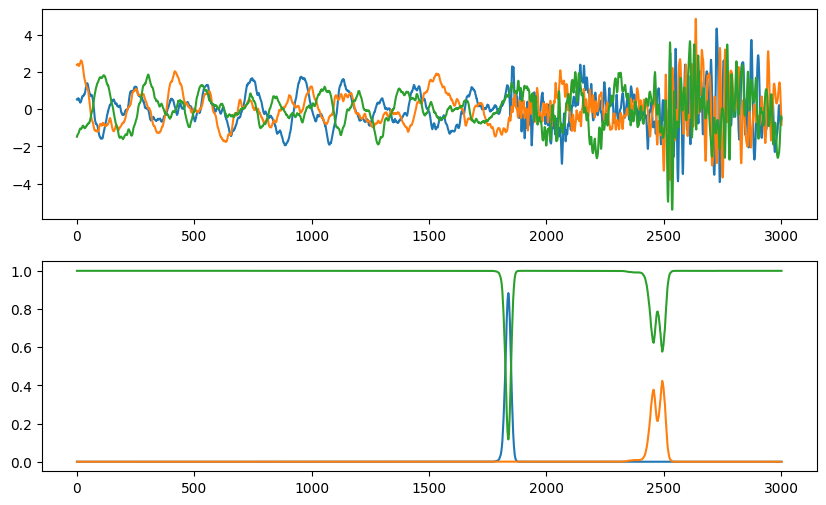

In [4]:
# plot results
wvno = 1
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
axes[0].plot(wv[wvno,:,:].T)
axes[1].plot(pred[wvno,:,:].T);

In [5]:
# Display architecture
summary(model)

Layer (type:depth-idx)                   Param #
PhaseNet                                 --
├─Conv1d: 1-1                            176
├─BatchNorm1d: 1-2                       16
├─ModuleList: 1-3                        --
│    └─ModuleList: 2-1                   --
│    │    └─Conv1d: 3-1                  448
│    │    └─BatchNorm1d: 3-2             16
│    │    └─Conv1d: 3-3                  448
│    │    └─BatchNorm1d: 3-4             16
│    └─ModuleList: 2-2                   --
│    │    └─Conv1d: 3-5                  896
│    │    └─BatchNorm1d: 3-6             32
│    │    └─Conv1d: 3-7                  1,792
│    │    └─BatchNorm1d: 3-8             32
│    └─ModuleList: 2-3                   --
│    │    └─Conv1d: 3-9                  3,584
│    │    └─BatchNorm1d: 3-10            64
│    │    └─Conv1d: 3-11                 7,168
│    │    └─BatchNorm1d: 3-12            64
│    └─ModuleList: 2-4                   --
│    │    └─Conv1d: 3-13                 14,336
│    │    